# Data Science Life Cycle:

### 1.) Data Collection: 

- from companies, from 3r party, Surveys..etc

### 2.) Feature Engineering:

- Handling the missing values, Imbalance data, noise data, format the data, Normalization, cleaning the data

### 3.) Feature Selection:

- Pearson Ranked Co-orelation, Heatmap, extra tree classifier, LASSO

### 4.) Create Model:

- Select correct model which is suitable for the usecase, Hyperparameter tunning.

### 5.) Test Model:

- ROC, AUC, F1-score, Precision, Recall, Accuracy

### 6.) Model Deployment:

- AWS, Heroku

<br>
_____________________________________________________________________________________________________________________________

# Feature Engineering

## * Missing Values

1.) Continuous Data

2.) Categorical Data

Before handling the missing values, we should know 

<b>Q.) what are the different types of missing data?</b>

`1.) Missig Completely At Random (MCAR):`

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

`2.) Missing Data Not At Random (MDNAR): Systematic missing values`

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

`3.) Missing At Random (MAR):`

<b>Example:</b> In a survey the 

<b>Man</b> didn't put there <b>Salary</b>.

& 

<b>Woman</b> didn't put there <b>Age</b>.

In [1]:
# C:\Users\HARDIK\seaborn-data\titanic.csv

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

- deck and age are somehow co-orelated therefore it is a MDNAR.
- embark_town is MCAR.

In [4]:
data[data['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


<b>Where ever there is NaN values present in deck insert 1 else 0</b>

In [5]:
data['deck_null'] = np.where(data['deck'].isnull(), 1, 0)

# Find the percentage of null val

data['deck_null'].mean()

0.7721661054994389

In [6]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,deck_null
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


<b>What % of survied people will be having Non-NaN values</b>

In [7]:
data.groupby(['alive'])['deck_null'].mean()

alive
no     0.877960
yes    0.602339
Name: deck_null, dtype: float64

- from the alive we can see that 60% of them are having missing values. 
- from the Non-alive we can see that 87% of them are having missing values.

The people who aren't alive has more missing values from the people who are alive.

<br>
_____________________________________________________________________________________________________________________________

## Techniques to handle mising values

1.) Mean, Median, Mode replacement.

2.) Random Sample Imputation.

3.) Capturing NAN values with a new feature.

4.) End of Distribution Imputation.

5.) Arbitrary Imputation.

6.) Frequent categories Imputation.

<br>
_____________________________________________________________________________________________________________________________

### 1.) Mean, Median, Mode Replacement:

***Q.) When to apply this?***

=> Mean, Median has the assumption that the data is <b>Missing Completely At Random (MCAR)</b>.

***Q.) What is the Solution for this?***

=> We solve this by replacing the NAN with the most frequent occurance of the variables.

In [8]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['age', 'fare', 'alive'])

df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


In [9]:
# % of NAN Values

df.isnull().mean()

age      0.198653
fare     0.000000
alive    0.000000
dtype: float64

In [10]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [11]:
median = df.age.median()
median

28.0

In [12]:
impute_nan(df, 'age', median)

df.head()

,age,fare,alive,age_median
0,22.0,7.2500,no,22.0
1,38.0,71.2833,yes,38.0
2,26.0,7.9250,yes,26.0
3,35.0,53.1000,yes,35.0
4,35.0,8.0500,no,35.0


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
age_median,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000


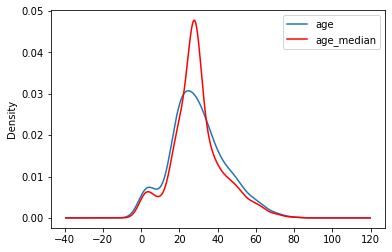

In [14]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['age'].plot(kind='kde', ax=ax) 
df.age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

***Advantages and Disadvantages of Mean, Median Imputation***

<b>Advantages:</b> 
    
- Easy to implement.
- Robust to Outliers.
- Faster way to obtain complete dataset.

<b>Disadvantages:</b>

- Change or distortion in the original variance. 
- Impacts the co-orelation.

<br>
_____________________________________________________________________________________________________________________________

## Random Sample Imputation

Random Sample Imputation consist of taking random observation from the dataset & we use this observation to replace NAN values.

***Q.) When to use it?***

- It assume that the data are <b>Missing Completely At Random (MCAR)</b>.

In [15]:
df.drop('age_median', axis=1, inplace=True)

In [16]:
df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


In [17]:
df.isnull().mean()

age      0.198653
fare     0.000000
alive    0.000000
dtype: float64

In [18]:
df['age'].dropna().sample()

544    50.0
Name: age, dtype: float64

In [19]:
df['age'].dropna().sample(df['age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [20]:
df[df.age.isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [21]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    # It will have random sample to fillna
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    
    # Pandas need to have same index in order to merge the dataset.
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

<b>df[variable+"_median"] = df[variable].fillna(median)</b>

- Create a new feature and there all the NAN values will be replaced with Median.

<b>df[variable+"_random"] = df[variable]</b>

- What ever the age feature data is there is getting copied inside that variable _ random.

<b>random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)</b>

- Here we will be getting all the index values and inside that index value we are putting some random data.

<b>random_sample.index = df[df[variable].isnull()].index</b>

- Since i have to match both index, so we merge the random sample back to the feature. 

<b>df.loc[df[variable].isnull(), variable+'_random'] = random_sample</b>

- Where ever there is a null just replace that with random sample.

In [22]:
median = df.age.median()
median

28.0

In [23]:
impute_nan(df, 'age', median)

In [24]:
df.head()

,age,fare,alive,age_median,age_random
0,22.0,7.2500,no,22.0,22.0
1,38.0,71.2833,yes,38.0,38.0
2,26.0,7.9250,yes,26.0,26.0
3,35.0,53.1000,yes,35.0,35.0
4,35.0,8.0500,no,35.0,35.0


- age_random : is created with random sample imputation

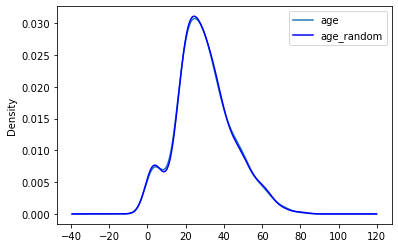

In [25]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['age'].plot(kind='kde', ax=ax) 
df.age_random.plot(kind='kde', ax=ax, color='blue') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

***Advantages***
- There is less distortion in variance.

***Disadvantages***
- Every situation randomness will not work.


<br>
_____________________________________________________________________________________________________________________________

## Capturing NAN values with a new feature.

This works well when you have data which is <b>Not Missing Completely At Random (NMCAR)</b>

In [26]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['age', 'fare', 'alive'])

df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


In [27]:
df['age_NAN'] = np.where(df['age'].isnull(),1,0)

In [28]:
df.head()

,age,fare,alive,age_NAN
0,22.0,7.2500,no,0
1,38.0,71.2833,yes,0
2,26.0,7.9250,yes,0
3,35.0,53.1000,yes,0
4,35.0,8.0500,no,0


In [29]:
df.age.median()

28.0

In [30]:
### Replace NAN with median

df.age.fillna(df.age.median(), inplace=True)

In [31]:
df.head(10)

,age,fare,alive,age_NAN
0,22.0,7.2500,no,0
1,38.0,71.2833,yes,0
2,26.0,7.9250,yes,0
3,35.0,53.1000,yes,0
4,35.0,8.0500,no,0
5,28.0,8.4583,no,1
6,54.0,51.8625,no,0
7,2.0,21.0750,no,0
8,27.0,11.1333,yes,0
9,14.0,30.0708,yes,0


***Advantages***
- Easy to implement.
- Capture the importance of missing values.

***Disadvantages***
- Increase number of features and may lead to curse of dimensionality.

<br>
_____________________________________________________________________________________________________________________________

## End of Distribution Imputation.

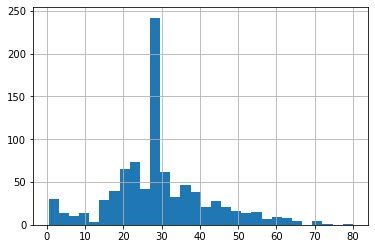

In [32]:
df.age.hist(bins=30)

Taking the values which are present at far and replace it with NAN.

In [33]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['age', 'fare', 'alive'])

df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


***Picking up the 3rd Standard Deviation***

In [34]:
extreme = df.age.mean() + 3 * df.age.std()
extreme

73.27860964406095

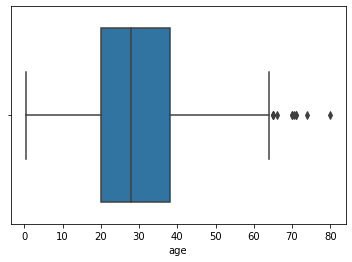

In [35]:
sns.boxplot('age', data=df)

In [36]:
def impute_nan(df, vairable, median, extreme):
    df[vairable+"_end_distribution"] = df[vairable].fillna(extreme) # create new var
    df[vairable].fillna(median, inplace=True)                       # filling new var with median  

In [37]:
impute_nan(df, 'age', df.age.median(), extreme)

In [38]:
df.head()

,age,fare,alive,age_end_distribution
0,22.0,7.2500,no,22.0
1,38.0,71.2833,yes,38.0
2,26.0,7.9250,yes,26.0
3,35.0,53.1000,yes,35.0
4,35.0,8.0500,no,35.0


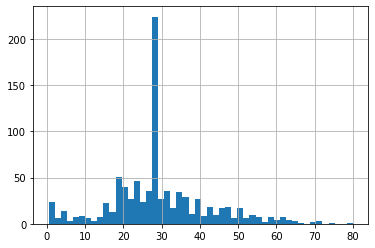

In [39]:
df.age.hist(bins=50)

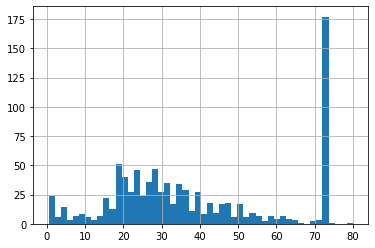

In [40]:
df.age_end_distribution.hist(bins=50)

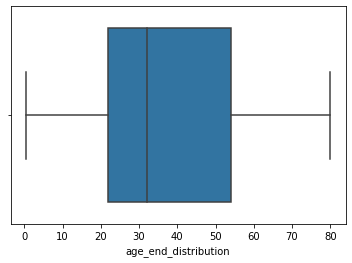

In [41]:
sns.boxplot('age_end_distribution', data=df)

<br>
_____________________________________________________________________________________________________________________________

## Arbitrary Imputation.

It consists of replacing NAN by an <b>Arbitrary values</b>.

***Arbitrary value***

- Should not be frequently present.

In [42]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['age', 'fare', 'alive'])

df.head()

,age,fare,alive
0,22.0,7.2500,no
1,38.0,71.2833,yes
2,26.0,7.9250,yes
3,35.0,53.1000,yes
4,35.0,8.0500,no


In [43]:
def impute_nan(df, variable):
    df[varaible+'_zero'] = df[variable].fillna(0)
    df[varaible+'_hundred'] = df[variable].fillna(100)

***We dont use this much***

<br>
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

# Handling NAN values in Categorical Columns

***Techniques***

## 1.) Feature Category Imputation

In [44]:
pd.set_option("display.max_columns",2000)
pd.set_option("display.max_columns",100)

df = pd.read_csv(r"D:\corona\house_train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [46]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [47]:
df = pd.read_csv('D:\corona\house_train.csv', usecols=['BsmtQual', 'GarageType', 'FireplaceQu','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [49]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [50]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [51]:
df.shape

(1460, 4)

#### Replace NAN of BsmtQual and GarageType with most recurrent value

In [52]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

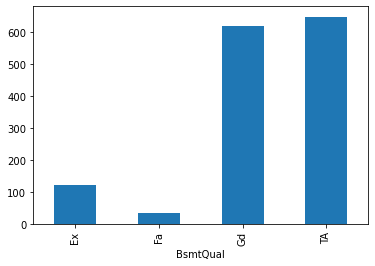

In [53]:
df.groupby(['BsmtQual'])['BsmtQual'].count().plot.bar()

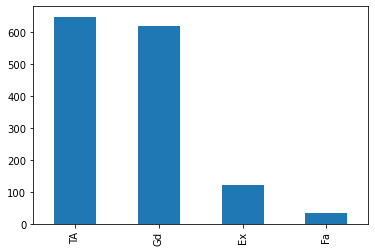

In [54]:
df['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()

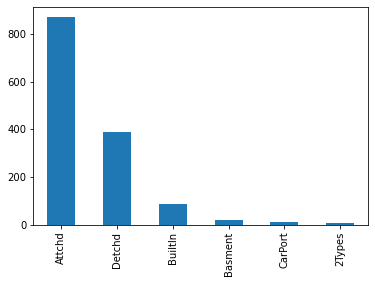

In [55]:
df['GarageType'].value_counts().sort_values(ascending=False).plot.bar()

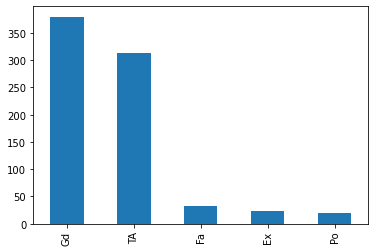

In [56]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()

### Writing Replacing Function

In [57]:
df['GarageType'].value_counts().index[0]

'Attchd'

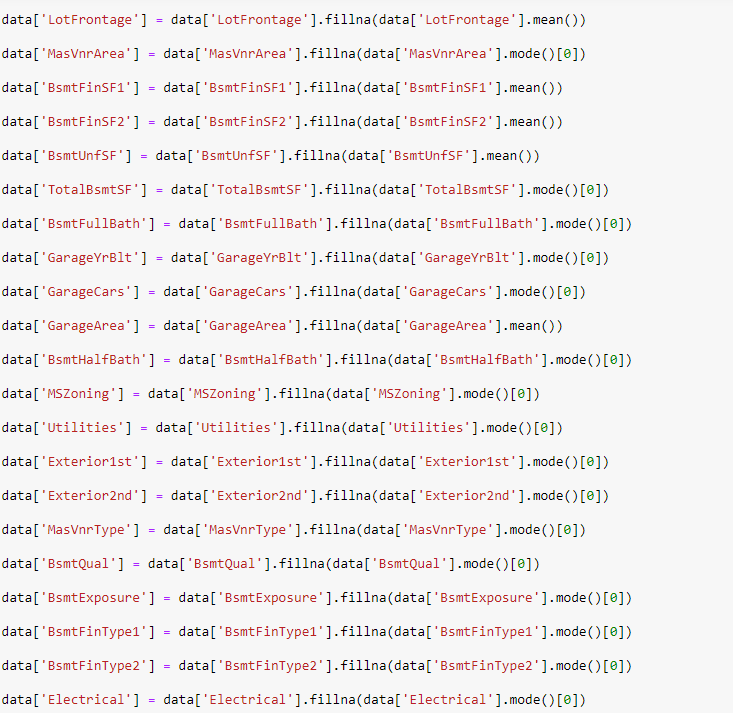

***This can be written like this***

In [58]:
# FUNCTION TO INSERT MOST FREQUENTLY OCCUERING CATEGORICAL VALUES

# def impute_nan(df, variable):
#     most_freq_cat = df[variable].mode()[0] # Find the most frequent category 
#     df[variable].fillna(most_freq_cat, inplace=True)


def impute_nan(df, variable):
    most_freq_cat = df[variable].value_counts().index[0] # Find the most frequent category 
    df[variable].fillna(most_freq_cat, inplace=True)

In [59]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, features)

In [60]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

***Advantages***

- Easy and fast to implement

***Disadvantages***

- Do Not Use this when you have higer missing values.

- Since we are using the more frequent labels, It may use them in over represented way, if there are many NAN's.

- It distorts the relation of the most freq labels

<br>
____________________________________________________________________________________________________________________________

## 2.) Adding a variable to capture NAN

In [62]:
df = pd.read_csv('D:\corona\house_train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [63]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [64]:
# Finding out most frequent categories

freq = df['BsmtQual'].mode()[0]

In [65]:
df['BsmtQual'].fillna(freq, inplace=True)

***Disadvantages***

- Increase the feature space

In [66]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)

# Finding out most frequent categories

freq = df['FireplaceQu'].mode()[0]

df['FireplaceQu'].fillna(freq, inplace=True)

In [67]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


Q.) Why we are creating another feature when we can directly impute with mode?

- When ever you have many features with lot of null values at that time we cannot just directly impute with mode. If we try to do that.... Than we are just over representating it with most freq char.

<br>
_____________________________________________________________________________________________________________________________

## ***Suppose if you have more freq categories, we just replace NAN with a new category***

### Creating a new category and putting that in NAN values

In [68]:
df = pd.read_csv('D:\corona\house_train.csv', usecols=['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [69]:
# If null : replace with Missing
# else    : replae with original value

def impute_nan(df, variable):
    df[variable+"_new_var"] = np.where(df[variable].isnull(),"Missing",df[variable]) 

In [70]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, features)

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


### Now Once we created new features based on old features we can drop the old features.

In [72]:
df.drop(['BsmtQual', 'FireplaceQu', 'GarageType'], axis=1, inplace=True)

In [73]:
df.head()

,SalePrice,BsmtQual_new_var,FireplaceQu_new_var,GarageType_new_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


<br>
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

# Handling Categorical Features

## One Hot encoding

In [74]:
data = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['sex'])
data.head()

,sex
0,male
1,female
2,female
3,female
4,male


In [75]:
pd.get_dummies(data, drop_first=True).head()

,sex_male
0,1
1,0
2,0
3,0
4,1


In [76]:
data = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['embarked'])
data.head()

,embarked
0,S
1,C
2,S
3,S
4,S


In [77]:
data.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [78]:
data.embarked.dropna(inplace=True)

In [79]:
data.head()

,embarked
0,S
1,C
2,S
3,S
4,S


In [80]:
pd.get_dummies(data, drop_first=False).head()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [81]:
pd.get_dummies(data, drop_first=True).head()

,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


***Disadvantages***

- Creates the curse of dimensionality

<br>
____________________________________________________________________________________________________________________________

## One Hot encoding with many categories in a feature

In [82]:
df = pd.read_csv(r"D:\Dig\mercedes.csv", usecols=['X0','X1','X2','X3','X4','X5','X6'])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [83]:
df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
k      11
au     11
b      11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
g       1
ab      1
Name: X0, dtype: int64

In [84]:
df.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [85]:
len(df.X0.unique())

47

In [86]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In a competion the data scientist had took ***10 most frequent categories in a feature***. Others features were dropped.

In [87]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

These are the Top 10 most frequently occuring variable.

Now we will only one hot encode this top 10's.

In [88]:
lst_10 = df.X1.value_counts().sort_values(ascending=False).head(10).index

lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [89]:
# Convert that into a list

lst_10 = list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [90]:
for cat in lst_10:
    df[cat] = np.where(df['X1']==cat,1,0)

In [91]:
lst_10.append('X1')
df[lst_10].head()

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v


<br>
____________________________________________________________________________________________________________________________


## Ordinal Number Encoding

<b>Basically dealing with data which can be RANKED</b>

Grading System: A,B,C,D

A - 1

B - 2

C - 3

D - 4

In [92]:
import datetime

today_date = datetime.datetime.today()

today_date

datetime.datetime(2021, 1, 24, 10, 28, 55, 608092)

#### Creating 15 days data and in that 15 dates data, we are going to extract the day value like (Monday, Tuesday, ..., Sunday).

Getting 1 day difference:

In [93]:
today_date-datetime.timedelta(1)    #  datetime.timedelta : Do difference between 2 date time value

datetime.datetime(2021, 1, 23, 10, 28, 55, 608092)

Getting 1 day difference:

In [94]:
today_date-datetime.timedelta(2)    #  datetime.timedelta : Do difference between 2 date time value

datetime.datetime(2021, 1, 22, 10, 28, 55, 608092)

***Creating last 15 days in a list and then we use that data***

In [95]:
# List comprehension

[today_date - datetime.timedelta(x) for x in range(0,15)]

[datetime.datetime(2021, 1, 24, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 23, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 22, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 21, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 20, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 19, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 18, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 17, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 16, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 15, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 14, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 13, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 12, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 11, 10, 28, 55, 608092),
 datetime.datetime(2021, 1, 10, 10, 28, 55, 608092)]

In [96]:
days = [today_date - datetime.timedelta(x) for x in range(0,15)]

Convert Days into data frame

In [97]:
data = pd.DataFrame(days)

data.columns = ["Days"]

data.head()

,Days
0,2021-01-24 10:28:55.608092
1,2021-01-23 10:28:55.608092
2,2021-01-22 10:28:55.608092
3,2021-01-21 10:28:55.608092
4,2021-01-20 10:28:55.608092


In [98]:
data['Days'].dt.day_name()

0        Sunday
1      Saturday
2        Friday
3      Thursday
4     Wednesday
5       Tuesday
6        Monday
7        Sunday
8      Saturday
9        Friday
10     Thursday
11    Wednesday
12      Tuesday
13       Monday
14       Sunday
Name: Days, dtype: object

In [99]:
data['Days'].dt.month    # similarly we can use   : .dt. } day, time, hour, minute, second

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: Days, dtype: int64

In [100]:
data['Weekday'] = data['Days'].dt.day_name()

In [101]:
data.head()

,Days,Weekday
0,2021-01-24 10:28:55.608092,Sunday
1,2021-01-23 10:28:55.608092,Saturday
2,2021-01-22 10:28:55.608092,Friday
3,2021-01-21 10:28:55.608092,Thursday
4,2021-01-20 10:28:55.608092,Wednesday


In [102]:
# encoding for Weekday

dictonary = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}

dictonary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [103]:
data['Weekday'].map(dictonary)

0     7
1     6
2     5
3     4
4     3
5     2
6     1
7     7
8     6
9     5
10    4
11    3
12    2
13    1
14    7
Name: Weekday, dtype: int64

In [104]:
data['Weekday_ordinal'] = data['Weekday'].map(dictonary)

data.head()

,Days,Weekday,Weekday_ordinal
0,2021-01-24 10:28:55.608092,Sunday,7
1,2021-01-23 10:28:55.608092,Saturday,6
2,2021-01-22 10:28:55.608092,Friday,5
3,2021-01-21 10:28:55.608092,Thursday,4
4,2021-01-20 10:28:55.608092,Wednesday,3


<br>
_____________________________________________________________________________________________________________________________

## Count or Frequency Encoding

In [105]:
train_set = pd.read_csv(r'http://archive.ics.uci.edu//ml/machine-learning-databases/adult/adult.data', 
                        header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [106]:
columns = [1,3,5,6,7,8,9,13]

train_set[columns].head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [107]:
train_set = train_set[columns]

train_set.columns = ['Employment', 'Degree', 'Status', 'Designation', 'Family_job', 'Race', 'Sex', 'Country']

In [108]:
train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [109]:
# how many categories is in the feature

for col in train_set.columns[:]:
    print(col, "----------->", len(train_set[col].unique()), 'labels')

Employment -----------> 9 labels
Degree -----------> 16 labels
Status -----------> 7 labels
Designation -----------> 15 labels
Family_job -----------> 6 labels
Race -----------> 5 labels
Sex -----------> 2 labels
Country -----------> 42 labels


Since country has the highest labels we will perform <b>count / frequency encoding</b> on that.

In this the whole <b>Country</b> feature will be get replaced by something else.

In [110]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [111]:
train_set['Country'].replace({"?":"Others"}, inplace=True)

In [112]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [113]:
train_set.Country.replace(to_replace = '?', value ="Others", inplace=True) 

In [114]:
train_set.Country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [115]:
train_set['Country'] = train_set.Country.str.replace('?', 'Others')

In [116]:
train_set['Country'].value_counts()

 United-States                 29170
 Mexico                          643
 Others                          583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [117]:
train_set['Country'].value_counts().to_dict()

{' United-States': 29170,
 ' Mexico': 643,
 ' Others': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' Greece': 29,
 ' France': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Cambodia': 19,
 ' Trinadad&Tobago': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Honduras': 13,
 ' Hungary': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

Aim is to replace 29170 these kind of values in Country Column.

In [118]:
country_map = train_set['Country'].value_counts().to_dict()

In [119]:
train_set['Country'] = train_set['Country'].map(country_map)

train_set.head()

,Employment,Degree,Status,Designation,Family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


***Advantages***

- No increase in number of features


***Disadvantages***

- If frequency of 2 countries are same <b>It will not able to handle it</b>. It will provide the same weight.

<br>
_____________________________________________________________________________________________________________________________


## Target Guided Ordinal Encoding

1.) Ordering the lables according to the target

2.) We may replace the labels by the joint probability of being 0 or 1

In [122]:
data = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv",usecols=['deck','survived'])
data.head()

,survived,deck
0,0,NaN
1,1,C
2,1,NaN
3,1,C
4,0,NaN


In [124]:
data['deck'].fillna('Missing', inplace=True)

In [125]:
data.head()

,survived,deck
0,0,Missing
1,1,C
2,1,Missing
3,1,C
4,0,Missing


In [126]:
data.head(20)

,survived,deck
0,0,Missing
1,1,C
2,1,Missing
3,1,C
4,0,Missing
5,0,Missing
6,0,E
7,0,Missing
8,1,Missing
9,1,Missing


In [127]:
data['deck'].unique()

array(['Missing', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [129]:
data['cabin'] = data['deck'].astype(str).str[0]

In [130]:
data.head()

,survived,deck,cabin
0,0,Missing,M
1,1,C,C
2,1,Missing,M
3,1,C,C
4,0,Missing,M


In [131]:
data.drop('deck', axis=1, inplace=True)

In [132]:
data.head()

,survived,cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [133]:
data.cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [134]:
data.cabin.value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: cabin, dtype: int64

In [135]:
# based on the cabin what is the percent of people surviving

data.groupby(['cabin'])['survived'].mean()

cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299419
Name: survived, dtype: float64

In [137]:
data.groupby(['cabin'])['survived'].mean().sort_values()

cabin
M    0.299419
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: survived, dtype: float64

In [139]:
data.groupby(['cabin'])['survived'].mean().sort_values().index

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='cabin')

In [140]:
ordinal_labels = data.groupby(['cabin'])['survived'].mean().sort_values().index

ordinal_labels

Index(['M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='cabin')

In [141]:
ordinal_labels2 = {k:i for i, k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{'M': 0, 'A': 1, 'G': 2, 'C': 3, 'F': 4, 'B': 5, 'E': 6, 'D': 7}

In [142]:
data['cabin_ordinal_labels'] = data['cabin'].map(ordinal_labels2)

data.head()

,survived,cabin,cabin_ordinal_labels
0,0,M,0
1,1,C,3
2,1,M,0
3,1,C,3
4,0,M,0


This cabin_ordinal_labels is based on the target values.

In [143]:
data.drop('cabin', inplace=True, axis=1)

In [144]:
data.head()

,survived,cabin_ordinal_labels
0,0,0
1,1,3
2,1,0
3,1,3
4,0,0


<br>
_____________________________________________________________________________________________________________________________

## Mean Encoding

In [146]:
data.groupby(['cabin_ordinal_labels'])['survived'].mean().to_dict()

{0: 0.29941860465116277,
 1: 0.4666666666666667,
 2: 0.5,
 3: 0.5932203389830508,
 4: 0.6153846153846154,
 5: 0.7446808510638298,
 6: 0.75,
 7: 0.7575757575757576}

In [147]:
mean_ordinal = data.groupby(['cabin_ordinal_labels'])['survived'].mean().to_dict()

data['mean_ordinal_encoding'] = data['cabin_ordinal_labels'].map(mean_ordinal)
data.head()

,survived,cabin_ordinal_labels,mean_ordinal_encoding
0,0,0,0.299419
1,1,3,0.593220
2,1,0,0.299419
3,1,3,0.593220
4,0,0,0.299419


***Advantages***
- Captures info within label, therefore rendering more predictive features.
- Creates monotonic relationship between var and target.

***Disadvantages***
- Prones / leads to overfitting.

<br>
_____________________________________________________________________________________________________________________________

## Probability Ration Encoding


Steps:

1.) Probablity of survived baed on the deck ---- categorical feature

2.) Probability of non survived

3.) probability of survived / probability of not-survived

4.) Dictionary to map cabin with proobability

5.) Replace with categorical feature

In [148]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv",usecols=['deck','survived'])
df.head()

,survived,deck
0,0,NaN
1,1,C
2,1,NaN
3,1,C
4,0,NaN


In [149]:
df['deck'].fillna('Missing', inplace=True)

In [150]:
df.head()

,survived,deck
0,0,Missing
1,1,C
2,1,Missing
3,1,C
4,0,Missing


In [151]:
df['deck'] = df['deck'].astype(str).str[0]
df.head()

,survived,deck
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [157]:
df['deck'].value_counts()

M    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [158]:
df['deck'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

In [160]:
prob_df = df.groupby(['deck'])['survived'].mean()

prob_df = pd.DataFrame(prob_df)
prob_df

,survived
deck,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299419


In [161]:
# what is the probability that the person had died?

prob_df['died'] = 1 - prob_df['survived'] 

prob_df.head()

,survived,died
deck,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


##### Probability Ratio Encoding Formula

Probability of Survived / Probability of Dead

In [162]:
prob_df['Prob_ratio'] = prob_df['survived'] / prob_df['died']

prob_df.head()

,survived,died,Prob_ratio
deck,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [163]:
prob_df['Prob_ratio'].to_dict()

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.4273858921161825}

In [164]:
prob_encoded = prob_df['Prob_ratio'].to_dict()

df['cabin_encoded'] = df['deck'].map(prob_encoded)

df.head()

,survived,deck,cabin_encoded
0,0,M,0.427386
1,1,C,1.458333
2,1,M,0.427386
3,1,C,1.458333
4,0,M,0.427386


now we can use cain_encoded instaead of deck.

<br>
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

# Transformation of Features


Q.) Why transforamtion of features are required?

For concepts such as Gradient descent to reach the <b>Global Minima Faster</b> we use ***Transformation***.

<b>TRANSFORAMTION IS `NOT` REQUIRED IN EACH AND EVERY ML ALGO</b>.

It is only <b>used</b> when we are dealing with concepts such as :

- Gradient Descent       ==> Linear Regression, Logistic Regression, ANN, CNN, RNN... etc
- Eucledian Distance     ==> KNN, DBSCAN Clustering, K-Means, Hierarchical Clustering...etc


It is <b>not used</b> in concepts such as :

- Ensemble Techniques   ==> Random Forest, Decision Tree...etc
- Boostig Techniques    ==> XGBoost, AdaBoost...etc

### Techniques which we are gonna use:


#### 1.) Normalization and Standarization
#### 2.) Scaling to Minimum and Maximum values
#### 3.) Scaling to Median and Quantiles
#### 4.) Gaussian Transformation:
- Logrithmic Transformation
- Reciprocal Transformation
- Square root Transformation
- Exponential Transformation
- Box-Cox Transformation

<br>
____________________________________________________________________________________________________________________________

### 1.) Standarization

We try to bring all the variable / features to a similar scale.

Standarization means centering the variables to 0.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['pclass', 'age', 'fare', 'survived'])
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
df.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [5]:
df.age.fillna(df.age.median(), inplace=True)

In [6]:
df.isnull().sum()

survived    0
pclass      0
age         0
fare        0
dtype: int64

### 1.) Standarization
***Standarization: we use the standard scaler from sklearn library***

Difference between <b>fit</b> and <b>fit_transform</b>.

with respect to ML algo we only do <b>fit</b> we train our data with that.

And suppose if you after we apply the ML algo and we want to change the data, at that time we use <b>fit_transform</b>.

formula :

`z = (X - X_mean) / std`

- Impacted by the outliers
- Use when we have problem related to standard normal distribution.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [8]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

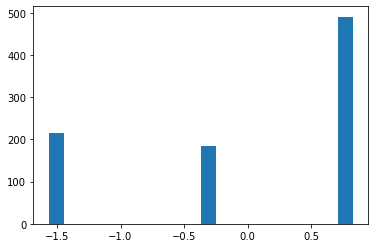

In [9]:
plt.hist(df_scaled[:,1], bins=20)  # [:,1] ====> All the rows of 1st column

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

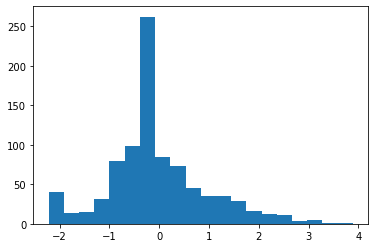

In [10]:
plt.hist(df_scaled[:,2], bins=20)  # [:,1] ====> All the rows of 1st column

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

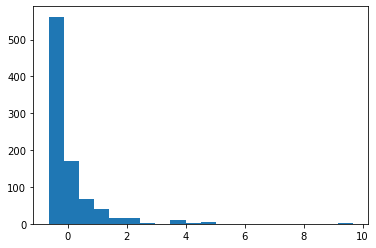

In [11]:
plt.hist(df_scaled[:,3], bins=20)  # [:,1] ====> All the rows of 1st column

<br>
___________________________________________________________________________________________________________________________

### 2.) Min Max Scaler

Min Max scaling scales the values between 0 to 1.

formula :

`MinMaxScaler = (X - X_min) / (X_max - X_min)`

- Used in Deep Learning techniques

In [12]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_min_max = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_min_max

,survived,pclass,age,fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

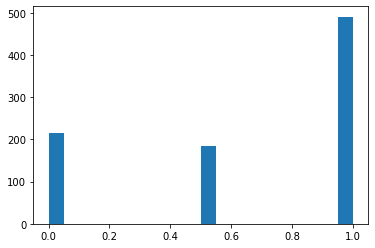

In [13]:
plt.hist(df_min_max['pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

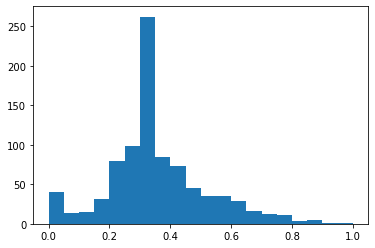

In [14]:
plt.hist(df_min_max['age'], bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

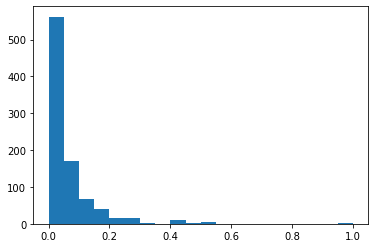

In [16]:
plt.hist(df_min_max['fare'], bins=20)

<br>
____________________________________________________________________________________________________________________________

### 3.) Robust Scaler

It is used to scale the feature to median and quantiles.

Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile 

formula:

`X_scaler = (X - X_median) / IQR`

- Robust to Outliers

Understanding percentile:
    
let's say we have: 1,2,3,4,5,6,7,8,9,10

9 } 90 percentile --- 90% of all values in this group is less than 9

8 } 80 percentile --- 80% of all values in this group is less than 8

7 } 70 percentile --- 70% of all values in this group is less than 7

...

In [17]:
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()
df_robust = pd.DataFrame(r_scaler.fit_transform(df), columns=df.columns)
df_robust.head()

,survived,pclass,age,fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

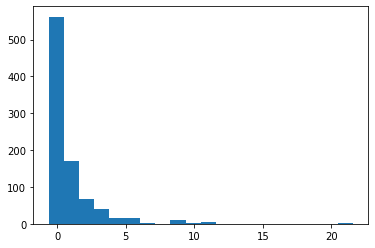

In [18]:
plt.hist(df_robust['fare'], bins=20)

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
        -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ]),
 <a list of 20 Patch objects>)

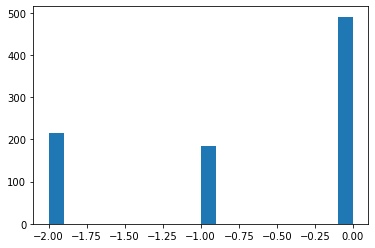

In [19]:
plt.hist(df_robust['pclass'], bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

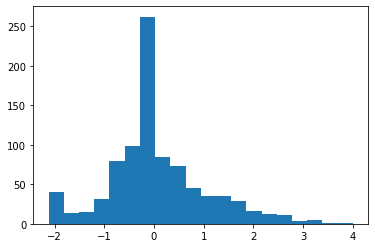

In [20]:
plt.hist(df_robust['age'], bins=20)

<br>
___________________________________________________________________________________________________________________________

### 4.) Gaussian Transformation

If the data is not normally distributed i.e when we have skewed data we use these techniques:

Some ML algo such as Linear and Logistic regression assume that the features are normally distributed.

give good <b>Accuracy</b> and <b>Performance</b>


- Logrithmic Transformation
- Reciprocal Transformation
- Square root Transformation
- Exponential Transformation (more general, you can use any exponent)
- Box-Cox Transformation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv", usecols=['age', 'fare', 'survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df['age'] = df['age'].fillna(df.age.median())

if we want to check if the feature is Gaussian / Normal distributed Q-Q plot.

In [5]:
import scipy.stats as stat
import pylab
 
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)   # 1st row, 2nd column, 1st index
    df[feature].hist()
    
    plt.subplot(1,2,2)   # 1st row, 2nd column, 2nd index
    stat.probplot(df[feature], dist='norm', plot=pylab)
    
    plt.show()

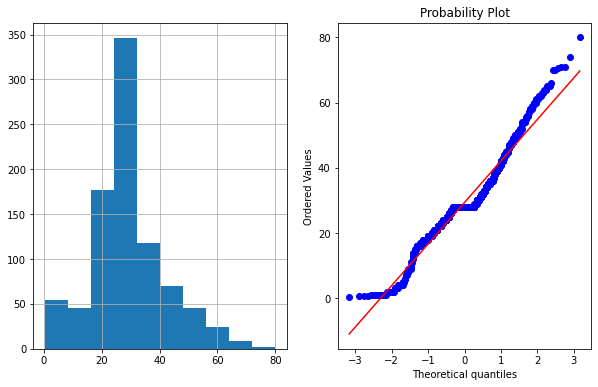

In [6]:
plot_data(df,'age')

if all the points fall in the straight line than we can say that it is normal distributed.

#### (i) Logarithmic transformation

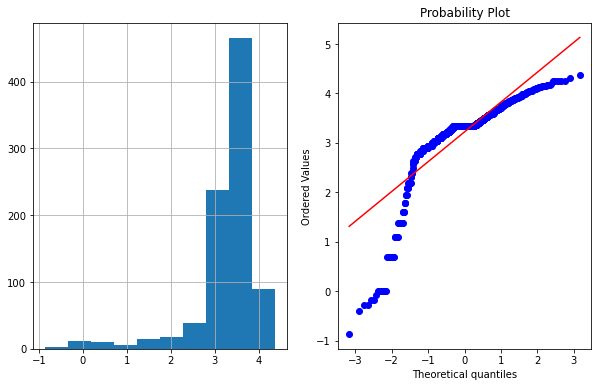

In [8]:
df['age_log'] = np.log(df['age'])
plot_data(df,'age_log')

Can't use it bcz it dosent fall into the straight line.

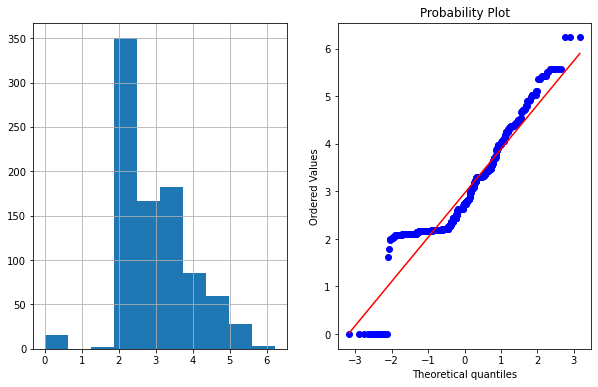

In [14]:
# fare

df['fare_log'] = np.log1p(df['fare'])
plot_data(df,'fare_log')

#### (i) Reciprocal Transformation

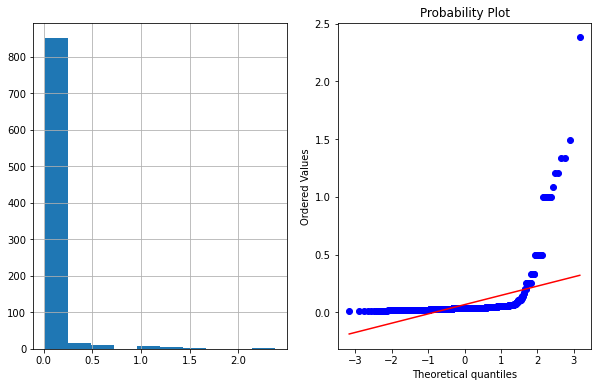

In [10]:
df['age_resiprocal'] = 1/df['age']
plot_data(df,'age_resiprocal')

#### 3.) Square root Transformation

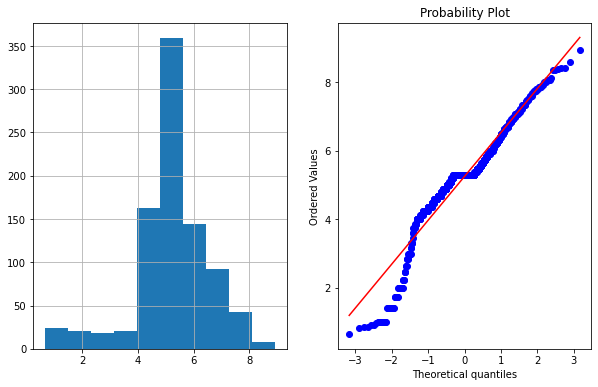

In [11]:
df['age_sq'] = (df.age)**(1/2)
plot_data(df,'age_sq')

#### 4.) Exponential Transformation (more general, you can use any exponent)

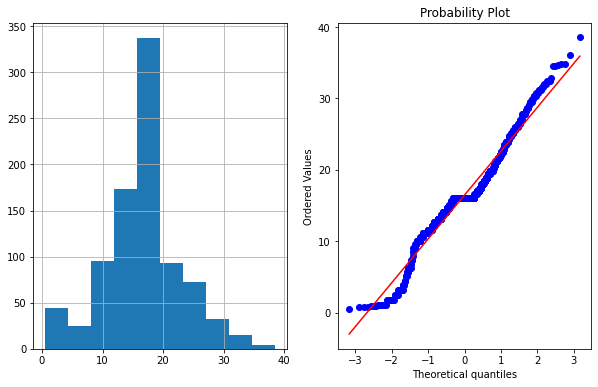

In [12]:
df['age_exp'] = df.age**(1/1.2)
plot_data(df,'age_exp')

#### 5.) Box-Cox Transformation

The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

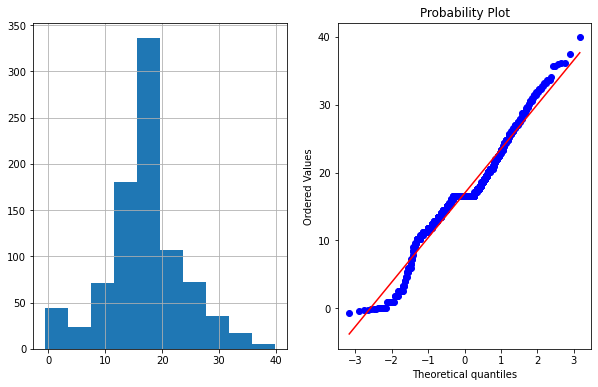

In [13]:
df['age_box_cox'],parameters = stat.boxcox(df['age'])
plot_data(df,'age_box_cox')

In [19]:
# # fare

# df['fare_boxcox'],parameters = stat.boxcox(df['fare'])
# plot_data(df,'fare_boxcox')

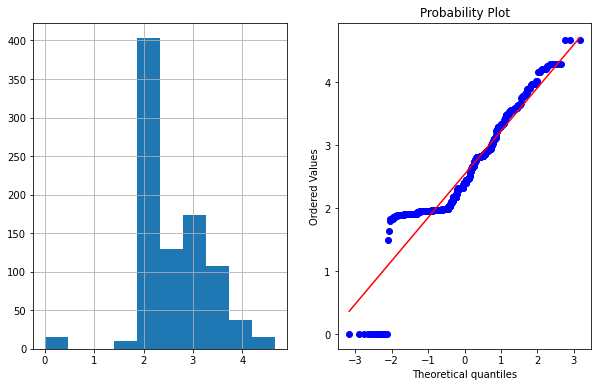

In [18]:
# fare

df['fare_boxcox'],parameters = stat.boxcox(df['fare']+1)
plot_data(df,'fare_boxcox')

<br>
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

# Handeling Imbalanced Data


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv(r"D:\corona\creditcard.csv")
df.head()

,val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,...,val22,val23,val24,val25,val26,val27,val28,val29,val30,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [22]:
df.isnull().sum()

val1      0
val2      0
val3      0
val4      0
val5      0
val6      0
val7      0
val8      0
val9      0
val10     0
val11     0
val12     0
val13     0
val14     0
val15     0
val16     0
val17     0
val18     0
val19     0
val20     0
val21     0
val22     0
val23     0
val24     0
val25     0
val26     0
val27     0
val28     0
val29     0
val30     0
Target    0
dtype: int64

In [23]:
df.shape

(284807, 31)

In [24]:
df['Target'].value_counts()

0    284315
1       492
Name: Target, dtype: int64

In [25]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Applying Random Forest

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [50]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [51]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [52]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56836    28]
 [   38    60]]
0.9988413328183702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.61      0.65        98

    accuracy                           1.00     56962
   macro avg       0.84      0.81      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
### Using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
y_pred2=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56862     2]
 [   22    76]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



***If you apply hyper-parameter tunning to this it will give you more fantastic results***

In [55]:
# Changing the importance of the class
class_weight = dict({0:1, 1:100})        # This means give '1' 100 times more value than '0' bcz its imbalanced 

### Using Random Forest applying class weights

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train, y_train)


y_pred2=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56863     1]
 [   23    75]]
0.9995786664794073
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



The above done is the last solution possible.

<br>
_____________________________________________________________________________________________________________________________

### Undersampling

Decrease the data which have higher datapoints.

***Do not use this bcz it will make lose of data.***

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"D:\corona\creditcard.csv")
df.head()

,val1,val2,val3,val4,val5,val6,val7,val8,val9,val10,...,val22,val23,val24,val25,val26,val27,val28,val29,val30,Target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
X = df.drop(['Target'], axis=1)
y = df['Target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
Counter(y_train)

Counter({0: 227451, 1: 394})

In [3]:
from collections import Counter  # counts the number of 0 and 1

from imblearn.under_sampling import NearMiss

ns = NearMiss(0.8)    # reduce it by the 80%
X_train_ns, y_train_ns = ns.fit_sample(X_train,y_train)
print("The number of class before the fit: {}".format(Counter(y_train)))
print("The number of class after the fit: {}".format(Counter(y_train_ns)))

D:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of class before the fit: Counter({0: 227451, 1: 394})
The number of class after the fit: Counter({0: 492, 1: 394})


In [7]:
(80/100)*492

393.6

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

classifier.fit(X_train_ns, y_train_ns)

RandomForestClassifier()

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred2=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[37954 18910]
 [    5    93]]
0.6679365190828974
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     56864
           1       0.00      0.95      0.01        98

    accuracy                           0.67     56962
   macro avg       0.50      0.81      0.41     56962
weighted avg       1.00      0.67      0.80     56962



<br>
_____________________________________________________________________________________________________________________________

### Oversampling

Increasing the value of the datapoint which are less in number

In [15]:
from collections import Counter  # counts the number of 0 and 1

from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(0.75)    # increase it by the 80%
X_train_os, y_train_os = os.fit_sample(X_train,y_train)
print("The number of class before the fit: {}".format(Counter(y_train)))
print("The number of class after the fit: {}".format(Counter(y_train_os)))

D:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of class before the fit: Counter({0: 227451, 1: 394})
The number of class after the fit: Counter({0: 227451, 1: 170588})


In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()

classifier2.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred2=classifier2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56863     1]
 [   20    78]]
0.9996313331694814
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.80      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



<br>
_____________________________________________________________________________________________________________________________

### SMORTomek

Use concepts of both <b>Undersampling</b> and <b>Oversampling</b>.

SMORTomek creates new points of the lowest number

In [19]:
from imblearn.combine import SMOTETomek

os = SMOTETomek(0.75)
X_train_os, y_train_os = os.fit_sample(X_train,y_train)
print("The number of class before the fit: {}".format(Counter(y_train)))
print("The number of class after the fit: {}".format(Counter(y_train_os)))

D:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of class before the fit: Counter({0: 227451, 1: 394})
The number of class after the fit: Counter({0: 226703, 1: 169840})


In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier()

classifier2.fit(X_train_os, y_train_os)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred2=classifier2.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[56852    12]
 [   15    83]]
0.9995259997893332
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



<b>
TN  |  FN
    
----|----

FP  |  TP
</b>

<br>
_____________________________________________________________________________________________________________________________

### Ensemble Techniques

In [21]:
from imblearn.ensemble import EasyEnsembleClassifier

easy = EasyEnsembleClassifier()
easy.fit(X_train, y_train)

EasyEnsembleClassifier()

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred2=easy.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[54969  1895]
 [    6    92]]
0.9666268740563885
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.94      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



<br>
_____________________________________________________________________________________________________________________________
_____________________________________________________________________________________________________________________________

# Decicussion Related to outliers and impact on Machine learning


### Which ML model is NOT sensitive to the outliers?
- Naviye Bayes Classification
- SVM
- Decision Tree
- Ensemble Techniques
- KNN
- DBSCAN

### Which ML model is sensitive to the outliers?
- Linear Regression
- Logistic Regression
- KMeans
- Hierarichal
- PCA
- ANN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv(r"C:\Users\HARDIK\seaborn-data\titanic.csv")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

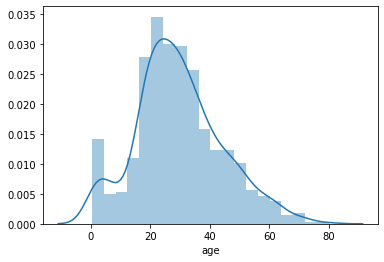

In [3]:
sns.distplot(data['age'].dropna())

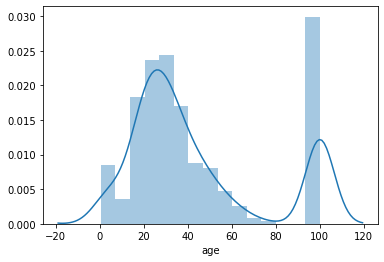

In [4]:
sns.distplot(data['age'].fillna(100))

Filled NaN with outliers

Text(0, 0.5, 'Num of passenger')

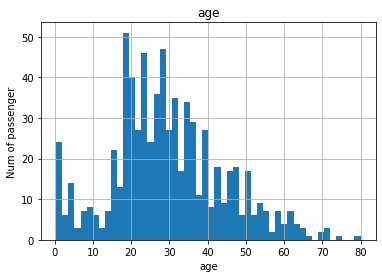

In [5]:
fig = data.age.hist(bins=50)
fig.set_title('age')
fig.set_xlabel('age')
fig.set_ylabel('Num of passenger')

When your data is distributed in NORMAL DISTRIBUTION there is a different approch to find outliers.

### How to remove outliers in NORMAL DISTRIBUTED data

for normal distribution we will be using 3 standard deviation

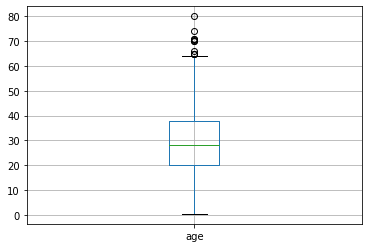

In [6]:
fig = data.boxplot(column='age')

In [7]:
data['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

##### Assuming age follows Normal Distribution. We will calculate the boundaries which differentiates the outliers.

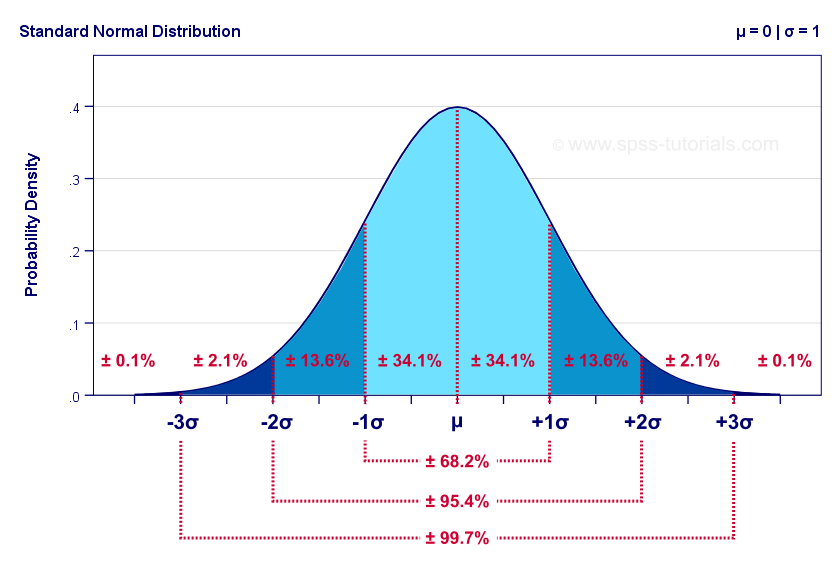

accept values till 3rd standard deviation...else its an outlier

In [8]:
# with mean we are gonna check 

# 3 standard deviation to left
upper = data['age'].mean() + 3 * data['age'].std()

# 3 standard devation to right
lower = data['age'].mean() - 3 * data['age'].std()

In [9]:
print(lower), print(upper), print(data['age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

***If any data point which is above 73.27 than that will be consider as an outliers.***

<br>
_____________________________________________________________________________________________________________________________

## Dealing with the outlier of the feature which is Skewed

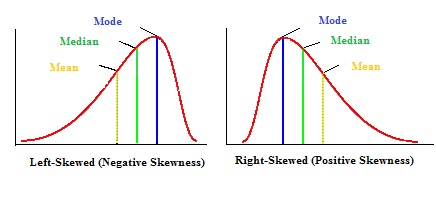

Text(0, 0.5, 'Num of passenger')

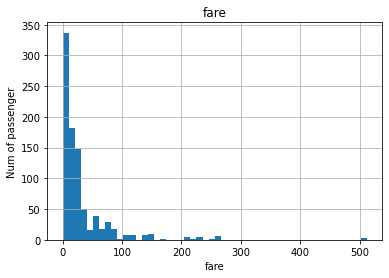

In [13]:
fig = data.fare.hist(bins=50)
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('Num of passenger') 

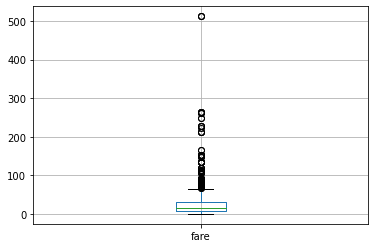

In [15]:
data.boxplot(column='fare')

lot of outliers

In [17]:
data.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

see the difference between <b>Max</b> and <b>75%</b> that means we have lot of outliers.

In [18]:
# calculating Inter Qunatile Range to calculate the boundaries

# IQR : is the difference between 75th percentile and 25th percentile
IQR = data.fare.quantile(0.75) - data.fare.quantile(0.25)

print("The difference between 75th percentile and 25th percentile is",IQR)        

The difference between 75th percentile and 25th percentile is 23.0896


In [19]:
# Computing the Lower bridge and upper bridge in IQR

lower_bridge = data['fare'].quantile(0.25) - (IQR*1.5) # go 1.5 times based on the left direction
upper_bridge = data['fare'].quantile(0.75) + (IQR*1.5) # go 1.5 times based on the right direction

print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [20]:
# If you find the extreme outliers

lower_bridge3 = data['fare'].quantile(0.25) - (IQR*3) # go 1.5 times based on the left direction
upper_bridge3 = data['fare'].quantile(0.75) + (IQR*3) # go 1.5 times based on the right direction

print(lower_bridge3)
print(upper_bridge3)

-61.358399999999996
100.2688


In [24]:
df = data.copy()

--------------------------------
Dealing with Age:

In [27]:
# where ever the age is greater than 73 i will be replace it by 73
df.loc[df['age']>73, 'age'] = 73

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'Num of passenger')

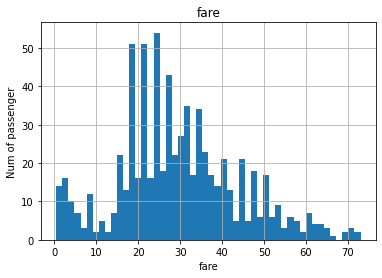

In [31]:
fig = df.age.hist(bins=50)
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('Num of passenger') 

--------------------------
Dealing with Fare:

In [29]:
df.loc[df['fare']>100, 'fare'] = 100

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Text(0, 0.5, 'Num of passenger')

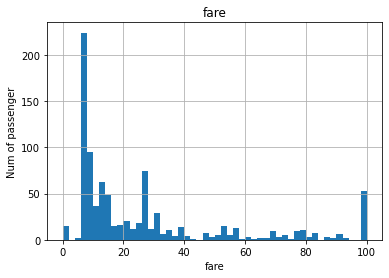

In [30]:
fig = df.fare.hist(bins=50)
fig.set_title('fare')
fig.set_xlabel('fare')
fig.set_ylabel('Num of passenger') 

__________________________________________

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(df[['age', 'fare']].fillna(0), df['survived'], test_size=0.2)

In [36]:
# Logistic Regression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

y_pred1 = log_model.predict_proba(X_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy Score: 0.6927374301675978
Roc_Auc_Score: 0.7159895150720839
[[102   7]
 [ 48  22]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       109
           1       0.76      0.31      0.44        70

    accuracy                           0.69       179
   macro avg       0.72      0.63      0.62       179
weighted avg       0.71      0.69      0.65       179



In [37]:
# RandomForest

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

Rf_model = RandomForestClassifier()
Rf_model.fit(X_train, y_train)
y_pred = Rf_model.predict(X_test)

y_pred1 = Rf_model.predict_proba(X_test)

print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Roc_Auc_Score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy Score: 0.659217877094972
Roc_Auc_Score: 0.7110091743119265
[[81 28]
 [33 37]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       109
           1       0.57      0.53      0.55        70

    accuracy                           0.66       179
   macro avg       0.64      0.64      0.64       179
weighted avg       0.66      0.66      0.66       179

